In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Juegos

In [13]:
games_reviews = pd.read_csv('steam_reviews.csv').drop(['funny','helpful','hour_played','is_early_access_review','review'],axis = 1)
list_games = games_reviews['title'].unique()
games_recommendations = pd.get_dummies(games_reviews,columns = ['recommendation']).groupby(['title']).agg(['sum'])

cant_recommend = games_recommendations['recommendation_Recommended']['sum']
cant_not_recommend = games_recommendations['recommendation_Not Recommended']['sum']

In [26]:
list_games

array(['Expansion - Hearts of Iron IV: Man the Guns', 'Dead by Daylight',
       'Wargroove', 'Wallpaper Engine', 'Factorio',
       'Insurgency: Sandstorm', 'Cold Waters', 'Tannenberg',
       'Pathfinder: Kingmaker', 'MONSTER HUNTER: WORLD',
       'Divinity: Original Sin 2 - Definitive Edition',
       'Football Manager 2019', "Garry's Mod", 'Survivor Pass: Vikendi',
       'Moonlighter', 'Terraria', 'GOD EATER 3',
       'Sid Meier’s Civilization® VI', 'Rocket League®',
       'Subnautica: Below Zero', "Tom Clancy's Rainbow Six® Siege",
       'ASTRONEER', 'Sid Meier’s Civilization® VI: Rise and Fall',
       'Kenshi', 'Euro Truck Simulator 2', 'Grand Theft Auto V',
       'RimWorld', 'NBA 2K19', 'RESIDENT EVIL 2 / BIOHAZARD RE:2',
       'Slay the Spire', 'My Time At Portia', 'Foundation', 'Beat Saber',
       "Sid Meier's Civilization® VI: Gathering Storm", 'Stardew Valley',
       'Farming Simulator 19', "PLAYERUNKNOWN'S BATTLEGROUNDS",
       'Overcooked! 2', "Don't Starve Toge

In [27]:
recom1 = cant_recommend['The Elder Scrolls V: Skyrim Special Edition']
not_recom1 = cant_not_recommend['The Elder Scrolls V: Skyrim Special Edition']

print("Cantidad de personas que recomiendan este juego:", recom1)
print("Cantidad de personas que no recomiendan este juego:", not_recom1)
print("Porcentaje de recomendacion: ", recom1/(recom1+not_recom1))

Cantidad de personas que recomiendan este juego: 983.0
Cantidad de personas que no recomiendan este juego: 490.0
Porcentaje de recomendacion:  0.6673455532926001


In [150]:
recom2 = cant_recommend["Rocket League®"]
not_recom2 = cant_not_recommend["Rocket League®"]

print("Cantidad de personas que recomiendan este juego:", recom2)
print("Cantidad de personas que no recomiendan este juego:", not_recom2)
print("Porcentaje de recomendacion: ", recom2/(recom2+not_recom2))

Cantidad de personas que recomiendan este juego: 61743.0
Cantidad de personas que no recomiendan este juego: 6164.0
Porcentaje de recomendacion:  0.9092287982093157


In [143]:
recom3 = cant_recommend["Grand Theft Auto V"]
not_recom3 = cant_not_recommend["Grand Theft Auto V"]

print("Cantidad de personas que recomiendan este juego:", recom3)
print("Cantidad de personas que no recomiendan este juego:", not_recom3)
print("Porcentaje de recomendacion: ", recom3/(recom3+not_recom3))

Cantidad de personas que recomiendan este juego: 58989.0
Cantidad de personas que no recomiendan este juego: 40967.0
Porcentaje de recomendacion:  0.5901496658529753


In [6]:
#cant_recommend = cant_recommend.to_frame()
#cant_recommend = cant_recommend['sum'].to_frame().reset_index()
#cant_recommend['date_posted'] =  pd.to_datetime(cant_recommend['date_posted'])
#cant_recommend = cant_recommend.groupby(['title',cant_recommend['date_posted'].dt.year]).agg(['sum'])['sum']#Agrupar por titulo, contar por año

In [117]:
games_hours_played = pd.read_csv('steam-200k.csv')
games_hours_played = games_hours_played.query('purchase == "play"').drop(['0','151603712','purchase'], axis = 1)
games_hours_played = games_hours_played.rename(columns = {'The Elder Scrolls V Skyrim': 'name_game', '1.0': 'hours_played'}, inplace = False)
list_games2 = games_hours_played['name_game'].unique()
games_hours_played = games_hours_played.groupby('name_game').agg(['sum']).sort_values([('hours_played','sum')],  ascending=False)

In [70]:
games_hours_played.query('name_game == "The Elder Scrolls V Skyrim"')

,hours_played
,sum
name_game,
The Elder Scrolls V Skyrim,70889.3


In [152]:
games_hours_played.query('name_game == "Rocket League"')

,hours_played
,sum
name_game,
Rocket League,7827.2


In [90]:
games_hours_played.query('name_game == "Grand Theft Auto V"')

,hours_played
,sum
name_game,
Grand Theft Auto V,22956.7


In [110]:
games_sales = pd.read_csv('games_sales.csv')
games_sales = games_sales.drop(['img','genre','publisher','developer','user_score','critic_score','vg_score','release_date','last_update'], axis = 1)
games_sales.query('title.str.contains("Skyrim")')

,Unnamed: 0,title,console,total_shipped,total_sales,na_sales,jp_sales,pal_sales,other_sales
24744,25125,The Elder Scrolls V: Skyrim - Dawnguard,PS3,NaN,NaN,NaN,NaN,NaN,NaN
24745,25126,The Elder Scrolls V: Skyrim - Dawnguard,PC,NaN,NaN,NaN,NaN,NaN,NaN
24746,25130,The Elder Scrolls V: Skyrim - Dawnguard,X360,NaN,NaN,NaN,NaN,NaN,NaN
36216,36783,The Elder Scrolls V: Skyrim,X360,NaN,8.88,5.10,0.10,2.83,0.85
36232,36799,The Elder Scrolls V: Skyrim,PS3,NaN,6.49,2.57,0.25,2.68,0.99
36269,36836,The Elder Scrolls V: Skyrim,PC,NaN,3.99,1.18,NaN,2.25,0.56
36277,36844,The Elder Scrolls V: Skyrim Special Edition,PS4,NaN,3.36,1.24,0.08,1.50,0.54
36357,36924,The Elder Scrolls V: Skyrim Special Edition,XOne,NaN,1.83,1.13,NaN,0.53,0.17
36439,37009,The Elder Scrolls V: Skyrim,NS,NaN,1.15,0.67,0.06,0.32,0.10
36445,37015,The Elder Scrolls V: Skyrim VR,PS4,NaN,1.13,0.47,0.01,0.47,0.19


In [106]:
games_sales.query('title == "Grand Theft Auto V"')

,Unnamed: 0,title,console,total_shipped,total_sales,na_sales,jp_sales,pal_sales,other_sales
3,6,Grand Theft Auto V,PS3,NaN,20.32,6.37,0.99,9.85,3.12
5,8,Grand Theft Auto V,PS4,NaN,19.39,6.06,0.60,9.71,3.02
9,12,Grand Theft Auto V,X360,NaN,15.86,9.06,0.06,5.33,1.42
11,14,Grand Theft Auto V,PC,12.6,NaN,NaN,NaN,NaN,NaN
18,21,Grand Theft Auto V,XOne,NaN,8.72,4.70,0.01,3.25,0.76
14068,14284,Grand Theft Auto V,XSX,NaN,NaN,NaN,NaN,NaN,NaN
14069,14285,Grand Theft Auto V,PS5,NaN,NaN,NaN,NaN,NaN,NaN


In [153]:
games_sales.query('title == "Rocket League"')

,Unnamed: 0,title,console,total_shipped,total_sales,na_sales,jp_sales,pal_sales,other_sales
48785,49550,Rocket League,Series,10.5,NaN,NaN,NaN,NaN,NaN
48926,49691,Rocket League,PS4,NaN,2.02,0.37,NaN,1.34,0.31
49020,49788,Rocket League,XOne,NaN,1.38,0.52,NaN,0.75,0.11
49652,50429,Rocket League,NS,NaN,0.40,0.21,NaN,0.16,0.03
50493,51282,Rocket League,PC,NaN,0.12,0.03,NaN,0.08,0.01


In [114]:
games_sales.query('title == "The Elder Scrolls V: Skyrim"')

,Unnamed: 0,title,console,total_shipped,total_sales,na_sales,jp_sales,pal_sales,other_sales
36216,36783,The Elder Scrolls V: Skyrim,X360,NaN,8.88,5.10,0.10,2.83,0.85
36232,36799,The Elder Scrolls V: Skyrim,PS3,NaN,6.49,2.57,0.25,2.68,0.99
36269,36836,The Elder Scrolls V: Skyrim,PC,NaN,3.99,1.18,NaN,2.25,0.56
36439,37009,The Elder Scrolls V: Skyrim,NS,NaN,1.15,0.67,0.06,0.32,0.10


## Películas

In [8]:
movies = pd.read_csv('movies.csv').drop(['genres'],axis = 1)
ratings_movies = pd.read_csv('ratings.csv').drop(['userId','timestamp'],axis = 1)
list_movies = movies['title'].unique()
movies_ratings_joined = pd.merge(ratings_movies, movies, on='movieId', how='outer')

cant_movies = len(list_movies)
cant_movie_rated = len(movies_ratings_joined.groupby('movieId')['movieId'].unique())

movies_ratings = pd.get_dummies(movies_ratings_joined, columns = ['rating']).groupby('movieId').agg(['sum'])
movies_ratings



,title,rating_0.5,rating_1.0,rating_1.5,rating_2.0,rating_2.5,rating_3.0,rating_3.5,rating_4.0,rating_4.5,rating_5.0
,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum
movieId,,,,,,,,,,,
1,Toy Story (1995)Toy Story (1995)Toy Story (199...,1,0,1,6,8,34,18,82,18,47
2,Jumanji (1995)Jumanji (1995)Jumanji (1995)Juma...,1,1,2,5,12,28,11,36,7,7
3,Grumpier Old Men (1995)Grumpier Old Men (1995)...,1,3,1,2,2,20,5,12,0,6
4,Waiting to Exhale (1995)Waiting to Exhale (199...,0,1,1,1,0,4,0,0,0,0
5,Father of the Bride Part II (1995)Father of th...,1,0,2,6,2,25,1,8,1,3
...,...,...,...,...,...,...,...,...,...,...,...
193581,Black Butler: Book of the Atlantic (2017),0,0,0,0,0,0,0,1,0,0
193583,No Game No Life: Zero (2017),0,0,0,0,0,0,1,0,0,0


In [11]:
print('Cantidad de peliculas totales: ', cant_movies) 
print('Cantidad de peliculas evaluadas: ', cant_movie_rated)

Cantidad de peliculas totales:  9737
Cantidad de peliculas evaluadas:  9742


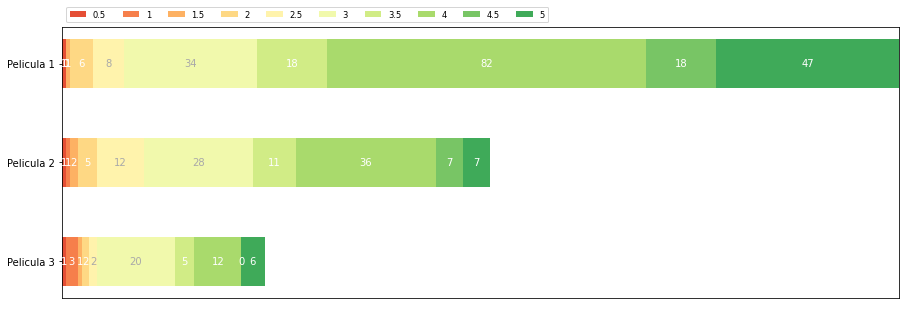

In [10]:
category_names = ['0.5','1','1.5','2','2.5','3','3.5','4','4.5','5']
results = {
    'Pelicula 1': list(movies_ratings.iloc[0])[1::],
    'Pelicula 2': list(movies_ratings.iloc[1])[1::],
    'Pelicula 3': list(movies_ratings.iloc[2])[1::],
}

def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(15, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(results, category_names)
plt.show()

source code: https://matplotlib.org/stable/gallery/lines_bars_and_markers/horizontal_barchart_distribution.html#sphx-glr-gallery-lines-bars-and-markers-horizontal-barchart-distribution-py